# Proyek Analisis Data: [BIKE SHARING DATASET]
- **Nama:** [Siti Nurhaliza]
- **Email:** [lijastudd@gmail.com]
- **ID Dicoding:** [stnrliza]

## Menentukan Pertanyaan Bisnis

1. Apa pengaruh hubungan antara holiday (hari libur) dengan penyewaan sepeda (cnt)?
2. Apa cuaca yang paling mempengaruhi jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
customers_df = pd.read_csv("https://raw.githubusercontent.com/parklijae/final-task/refs/heads/main/day.csv")
customers_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset mencakup variabel kunci seperti **season, dan jumlah penyewaan sepeda**, yang berguna untuk memahami pengaruh cuaca terhadap aktivitas bersepeda.
- Pola berdasarkan **musim dan hari libur** berpotensi memengaruhi **jumlah penyewaan sepeda, membuka peluang untuk analisis lebih mendalam.**

### Assessing Data

In [3]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
customers_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- customers_df.info() adalah **fungsi** yang memberikan informasi **data jumlah kolom beserta type datanya**. kolom **season, holiday, dan cnt** memiliki **tipe data integer64.**
- customers_df.describe() adalah **fungsi** yang berguna untuk membuka dataset **berdasarkan data statistik (dari jumlah hingga quartil).** Terlihat bahwa setiap kolom memiliki **nilai count yang sama** artinya **tidak ada missing value atau duplicate data.**

### Cleaning Data

pada bagian cleaning akan dilakukan **penghapusan data duplicate dan missing value** tapi analisis data hanya menggunakan kolom season, holiday dan cnt maka **tidak ada yang perlu dibersihkan** karena **data telah sesuai dari jumlah dan juga type data**.

## Exploratory Data Analysis (EDA)

### Explore ...

In [6]:
customers_df.groupby(by=["holiday"]).agg({
    "cnt": ["max", "min", "mean", "std"],
})

cnt                                
          max   min         mean          std
holiday                                      
0        8714    22  4527.104225  1929.013947
1        7403  1000  3735.000000  2103.350660

**INSIGHT**:

1. pada tabel diatas terlihat bahwa **kolom holiday terbagi jadi dua** nilai yaitu **0 (tidak libur**) dan **1 (untuk libur)**
2. bisa dikatakan bahwa **rata rata libur sebanyak 3735 hari** dan **rata rata tidak libur sebanyak 4527.**

In [ ]:
customers_df.groupby(by=["weathersit"]).agg({
    "cnt": ["max", "min", "mean", "std"],
})

cnt                               
             max  min         mean          std
weathersit                                     
1           8714  431  4876.786177  1879.483989
2           8362  605  4035.862348  1809.109918
3           4639   22  1803.285714  1240.284449

**INSIGHT**:

1. pada tabel diatas terlihat bahwa **kolom holiday terbagi jadi tiga** nilai yaitu **1 (cerah), 2 (kabut), dan 3 (hujan)**
2. bisa dikatakan bahwa cuaca **sering cerah yaitu sebanyak 4876 hari** dan **hujan yaitu sebanyak 1803.**

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa pengaruh hubungan antara **holiday (hari libur)** dengan **penyewaan sepeda (cnt)**?

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


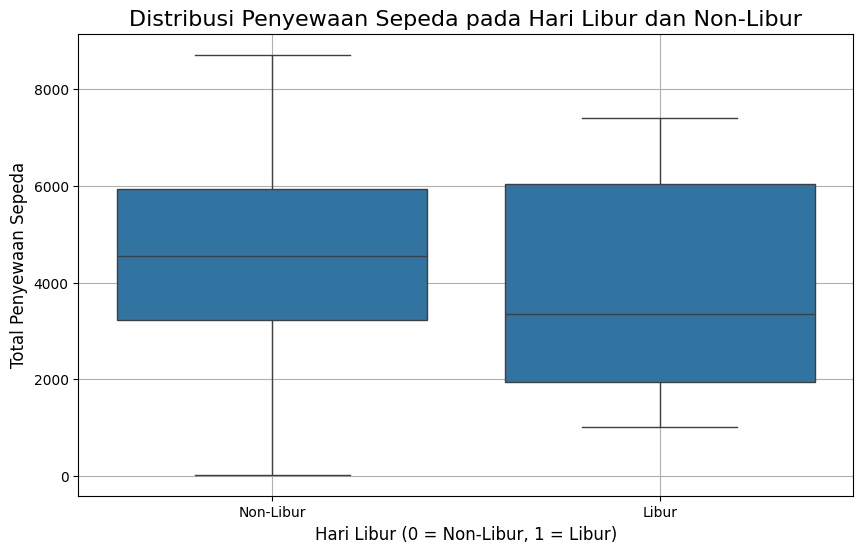

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mengambil dataset
url = "https://raw.githubusercontent.com/staryzcode/dicoding-task/main/day.csv"
customers_df = pd.read_csv(url)

# Memeriksa apakah kolom yang diperlukan ada dalam DataFrame
if 'holiday' in customers_df.columns and 'cnt' in customers_df.columns:
    # Membuat box plot untuk melihat distribusi penyewaan sepeda pada hari libur dan non-libur
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=customers_df, x='holiday', y='cnt')
    plt.title('Distribusi Penyewaan Sepeda pada Hari Libur dan Non-Libur', fontsize=16)
    plt.xlabel('Hari Libur (0 = Non-Libur, 1 = Libur)', fontsize=12)
    plt.ylabel('Total Penyewaan Sepeda', fontsize=12)
    plt.xticks([0, 1], ['Non-Libur', 'Libur'])  # Menambahkan label untuk sumbu x
    plt.grid()
    plt.show()
else:
    print("Kolom yang diperlukan tidak ditemukan dalam dataset.")


**INSIGHT:**

1. **grafik boxplot adalah grafik yang detail** karena **nilai menunjukkan nilai max, min, rata rata dan quartil.**
2. terlihat bahwa rata rata dari **tidak libur adalah sekitar 4500** dan **hal setara dengan data diatas** begitupun data libur.

### Pertanyaan 2: Apa pengaruh hubungan antara **holiday (hari libur)** dengan **penyewaan sepeda cnt?**

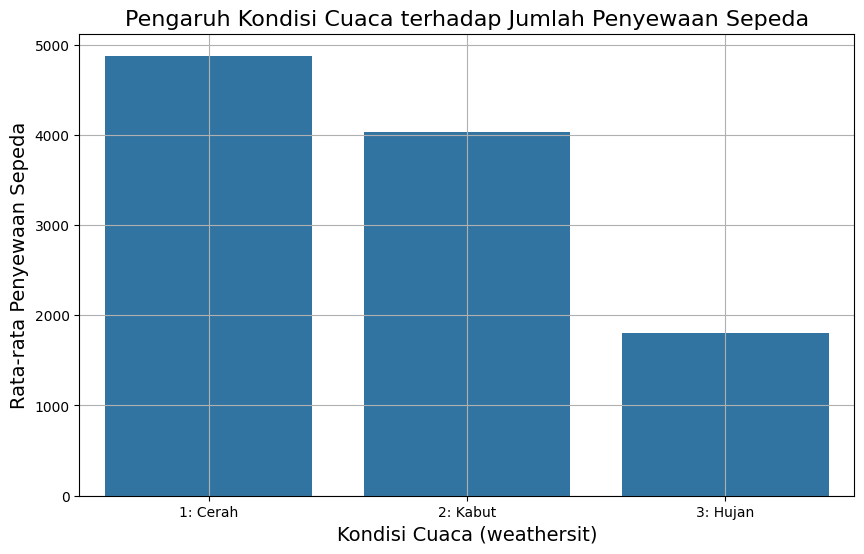

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung rata-rata penyewaan sepeda berdasarkan kondisi cuaca
weather_group = customers_df.groupby('weathersit')['cnt'].mean().reset_index()

# Visualisasi menggunakan bar plot
plt.figure(figsize=(10,6))
sns.barplot(data=weather_group, x='weathersit', y='cnt', dodge=False)

# Menambahkan judul dan label sumbu
plt.title('Pengaruh Kondisi Cuaca terhadap Jumlah Penyewaan Sepeda', fontsize=16)
plt.xlabel('Kondisi Cuaca (weathersit)', fontsize=14)
plt.ylabel('Rata-rata Penyewaan Sepeda', fontsize=14)

# Memberikan keterangan a untuk kondisi cuaca
plt.xticks(ticks=[0, 1, 2], labels=['1: Cerah', '2: Kabut', '3: Hujan'])

plt.legend([],[], frameon=False)  # Menonaktifkan legenda jika tidak diperlukan
plt.grid()
plt.show()


**INSIGHT:**

1. grafik barplot adalah grafik sederhana menunjukkan bahwa **jumlah rata-rata penyewaan sepeda paling tinggi terjadi pada kondisi cuaca cerah** yaitu sekitar 4900, sedangkan **rata-rata penyewaan menurun signifikan pada kondisi cuaca hujan.** yaitu sekitar 1800.

## Analisis Lanjutan (Opsional)
GRAFIK HEATMAP HUBUNGAN ANTAR VARIABEL


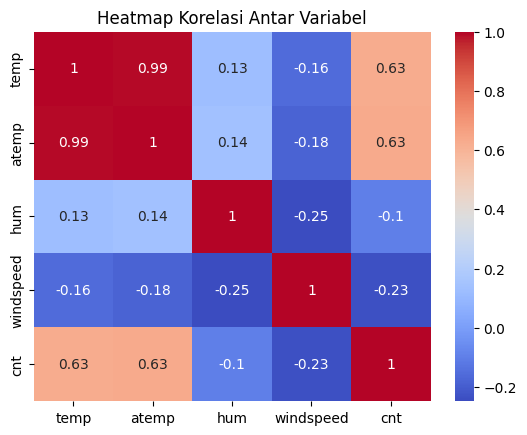

In [18]:
corr_matrix = customers_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
fig, ax = plt.subplots()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
ax.set_title('Heatmap Korelasi Antar Variabel')
plt.show()

**INSIGHT:**
1. grafik di atas **memperlihatkan korelasi antar 5 variabel satu sama lain**.
2. grafik tersebut menunjukkan **rentang nilai 1 hingga -1**. jika bernilai **positif maka kedua variabel berbanding lurus** (jika x meningkat maka y meningkat). jika bernilai **negatif maka kedua variabel berbanding terbalik** (jika x meningkat maka y menurun)
3. nilai **temp dan atemp berbanding lurus dengan cnt** karena bernilai positif.
4. sedangkan **hum dan dan windspeed berbanding terbalik dengan cnt** karena bernilai negatif.

## Conclusion